In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

In [26]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [27]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [30]:
engine.execute('SELECT min(date) FROM measurement').fetchall()

[('2010-01-01',)]

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipit_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precipit_df = pd.DataFrame(precipit_data).set_index('date')

# Sort the dataframe by date

precipit_df = precipit_df.sort_values(by='date').dropna()
precipit_df


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


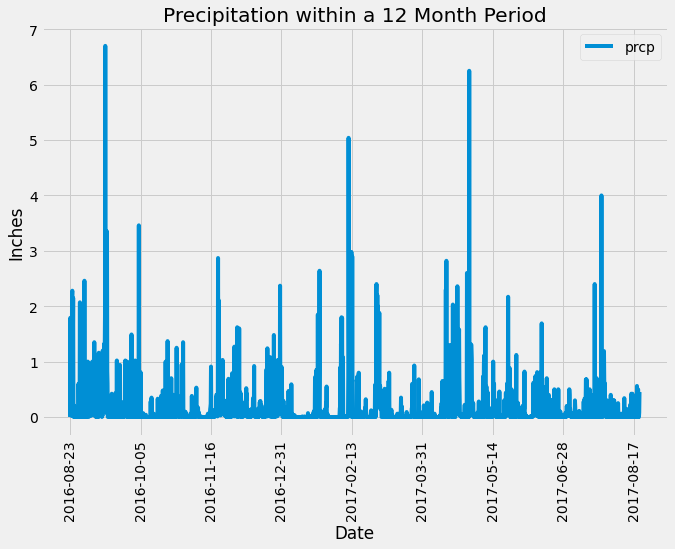

In [76]:
# Use Pandas Plotting with Matplotlib to plot the data
precipit_df.plot(figsize=(10,7), rot=90)
plt.title("Precipitation within a 12 Month Period")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show
plt.savefig("precipitation plot.png")

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipit_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.id).count() 
stations

9

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(measurement.station, measurement.tobs)\
    .filter(measurement.date > '2016-08-23')\
    .filter(measurement.date <= '2017-08-23')\
    .filter(measurement.station == "USC00519281").all()

station_tobs

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [48]:
temp_station_df = pd.DataFrame(station_tobs, columns=["Station", "Temp. Observations"])
temp_station_df

,Station,Temp. Observations
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


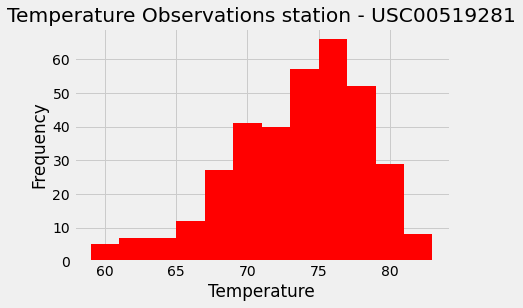

In [75]:
temp_station_df["Temp. Observations"].hist(bins=12, color="red")
plt.title("Temperature Observations station - USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("temp station plot.png")
plt.show()

# Close session

In [60]:
# Close Session
session.close()